<a href="https://colab.research.google.com/github/mudnaziri/basic-python-syntax/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/medical_students_dataset.csv")
print(df)

        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0              1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1              2.0   NaN    Male  152.069157  47.630941          B        NaN   
2              3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3              NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4              5.0  23.0  Female         NaN  46.234173          O        NaN   
...            ...   ...     ...         ...        ...        ...        ...   
199995         NaN  24.0    Male  176.503260  95.756997          B  30.737254   
199996     99997.0  29.0  Female  163.917675  45.225194        NaN  16.831734   
199997     99998.0  34.0  Female         NaN  99.648914        NaN  33.189303   
199998     99999.0  30.0  Female  156.446944  50.142824          A  20.486823   
199999    100000.0  20.0  Female  153.927409  99.928405          O  42.175189   

        Temperature  Heart 

In [ ]:
#--------------------------
# CLEANING THE DATASAT
#--------------------------

print("Before Cleaning the dataset")
print(df.info())

df.fillna(df.mean(numeric_only=True),inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

print("Count the Missing Value")
print(df.isnull().sum())

print("After Cleaning the dataset")
print(df.info())

print(df.describe(include=[np.number]))

print("Count of duplicate numbers: ")
print(df.duplicated().sum())

print(df.drop_duplicates(inplace=True))

Before Cleaning the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Count the Missing Value
Student ID        0
Age               0
Gender            0
Height            0
Weight   

Gender
Male      103008
Female     84420
Name: count, dtype: int64
Here we convert Male into 1 and Female into 0
0         0
1         1
2         0
3         1
4         0
         ..
199995    1
199996    0
199997    0
199998    0
199999    0
Name: gender_numeric, Length: 187428, dtype: int64


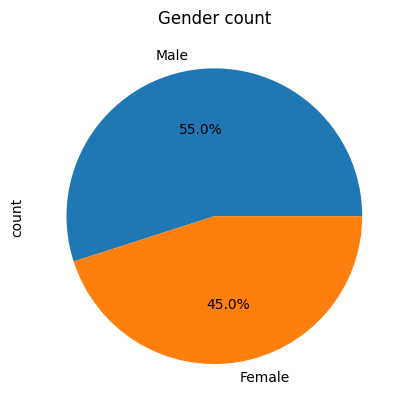

In [ ]:
#------------------
# COUNT OF GENDER
#------------------

print(df["Gender"].value_counts())

df["gender_numeric"] = df["Gender"].map({"Male":1,"Female":0})  # we convert Male=1 & female=0 for making graph b/w them
print("Here we convert Male into 1 and Female into 0")
print(df["gender_numeric"])

df["Gender"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender count")
plt.show()

In [ ]:
heart_rate_risk=df.groupby("gender_numeric")["Heart Rate"].mean()
print(heart_rate_risk)

gender_numeric
0    79.564233
1    79.456214
Name: Heart Rate, dtype: float64


gender_numeric
0    79.564233
1    79.456214
Name: Heart Rate, dtype: float64


/tmp/ipython-input-3456573957.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heart_attack_rate.index,y=heart_attack_rate, palette=['pink', 'lightblue'],width=0.9)


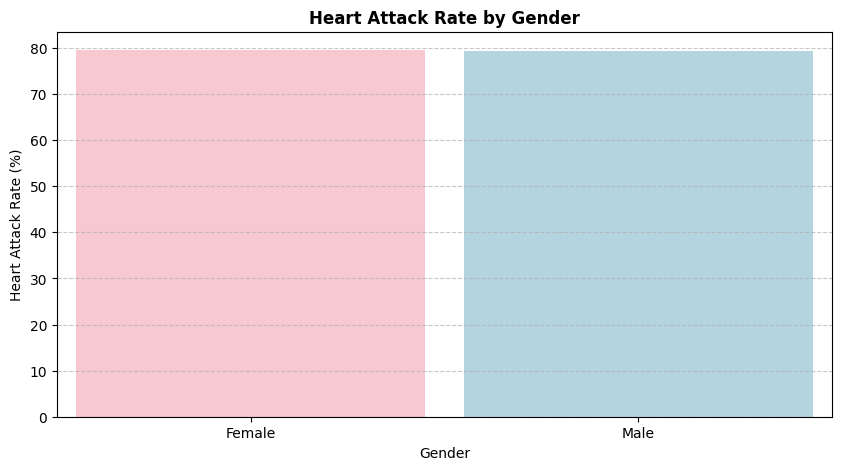

In [ ]:
heart_attack_rate = df.groupby('gender_numeric')['Heart Rate'].mean()  # Multiply by 100 to get percentage
print(heart_attack_rate)

plt.figure(figsize=(10,5))
sns.barplot(x=heart_attack_rate.index,y=heart_attack_rate, palette=['pink', 'lightblue'],width=0.9)
plt.title("Heart Attack Rate by Gender",fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Heart Attack Rate (%)")
plt.xticks(heart_attack_rate.index, ["Female","Male"]) # Corrected syntax and set labels
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()

Heart Rate
60.000000    70.243899
61.000000    69.451254
62.000000    70.125080
63.000000    69.835404
64.000000    70.383809
65.000000    69.876077
66.000000    69.835900
67.000000    70.354900
68.000000    69.964294
69.000000    69.874003
70.000000    69.830860
71.000000    69.716078
72.000000    70.253144
73.000000    70.274775
74.000000    69.533733
75.000000    69.395147
76.000000    69.867433
77.000000    69.943761
78.000000    70.321462
79.000000    70.531238
79.503767    69.982774
80.000000    69.842344
81.000000    69.509669
82.000000    70.141068
83.000000    70.056632
84.000000    70.504036
85.000000    69.749291
86.000000    69.690074
87.000000    70.162742
88.000000    69.000163
89.000000    70.042314
90.000000    70.490497
91.000000    69.908601
92.000000    70.249993
93.000000    70.284484
94.000000    69.494988
95.000000    70.100022
96.000000    69.968467
97.000000    70.124100
98.000000    69.911380
99.000000    70.218799
Name: Weight, dtype: float64


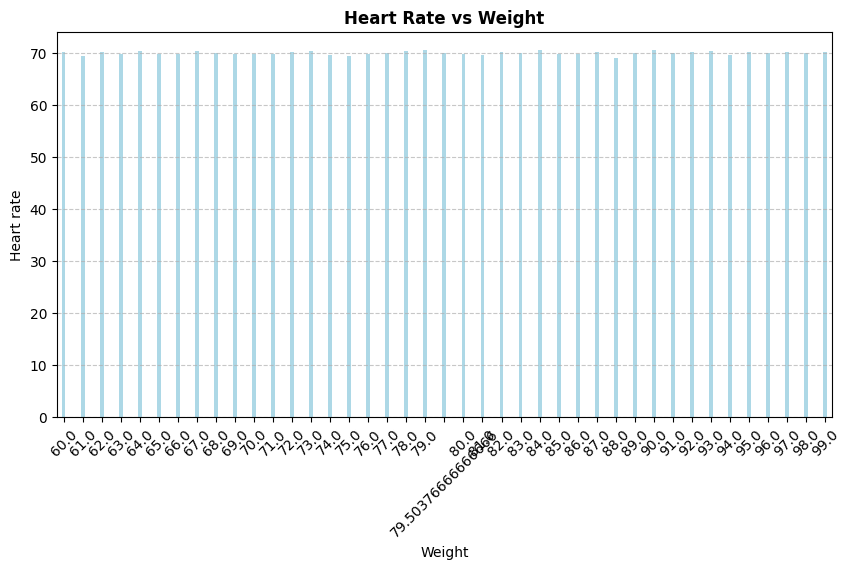

In [ ]:
heart_weight = df.groupby("Heart Rate")["Weight"].mean()
print(heart_weight)

heart_weight.plot(kind="bar",figsize=(10,5),color="lightblue",width=0.2)
plt.title("Heart Rate vs Weight",fontweight="bold")
plt.xlabel("Weight")
plt.ylabel("Heart rate")
plt.xticks(rotation=45)
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()

Heart Rate
60.000000    114.764069
61.000000    115.175801
62.000000    114.580109
63.000000    114.528510
64.000000    114.223652
65.000000    114.282192
66.000000    114.670311
67.000000    114.442247
68.000000    114.561768
69.000000    114.236762
70.000000    114.843113
71.000000    114.299601
72.000000    114.522960
73.000000    114.210316
74.000000    114.132224
75.000000    114.259076
76.000000    114.507868
77.000000    114.423863
78.000000    114.557251
79.000000    114.829560
79.503767    114.505385
80.000000    114.698440
81.000000    114.968776
82.000000    114.578310
83.000000    114.600276
84.000000    114.507067
85.000000    115.058547
86.000000    114.967967
87.000000    114.209547
88.000000    114.671595
89.000000    114.851912
90.000000    114.410856
91.000000    114.569989
92.000000    114.782284
93.000000    114.578742
94.000000    114.917185
95.000000    114.424093
96.000000    114.428832
97.000000    114.528188
98.000000    114.542640
99.000000    114.600610
Name:

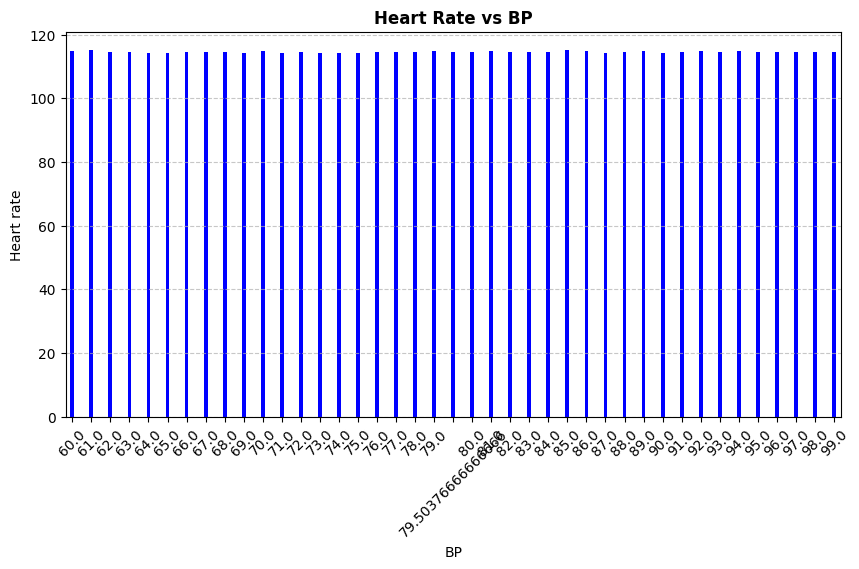

In [ ]:
heart_bp =df.groupby("Heart Rate")["Blood Pressure"].mean()
print(heart_bp)

heart_bp.plot(kind="bar",figsize=(10,5),color="blue",width=0.2)
plt.title("Heart Rate vs BP",fontweight="bold")
plt.xlabel("BP")
plt.ylabel("Heart rate")
plt.xticks(rotation=45)
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()

Diabetes
No     170440
Yes     16988
Name: count, dtype: int64
   gender_numeric Diabetes  count
0               0       No  76836
1               0      Yes   7584
2               1       No  93604
3               1      Yes   9404


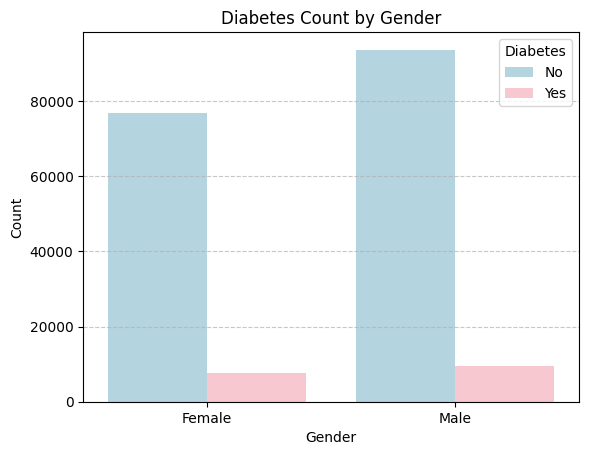

In [ ]:
print(df["Diabetes"].value_counts())
Diabetes = df.groupby("gender_numeric")["Diabetes"].value_counts().reset_index(name='count')
print(Diabetes)

sns.barplot(x="gender_numeric",y="count",hue="Diabetes",data=Diabetes,palette=["lightblue","pink"])
plt.xticks(heart_attack_rate.index, ["Female","Male"])
plt.title("Diabetes Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()

     gender_numeric  Blood Pressure  count
0                 0      114.558033   8917
1                 0      119.000000   1634
2                 0      136.000000   1633
3                 0      117.000000   1606
4                 0      106.000000   1588
..              ...             ...    ...
97                1       98.000000   1777
98                1      132.000000   1776
99                1      126.000000   1763
100               1       95.000000   1731
101               1      137.000000   1728

[102 rows x 3 columns]


/tmp/ipython-input-1374810276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender_numeric",y="count",data=bpp,palette=["lightblue","pink"])


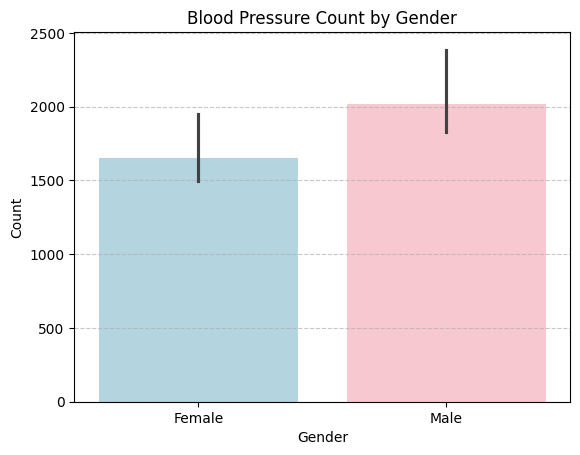

In [ ]:
bpp = df.groupby("gender_numeric")["Blood Pressure"].value_counts().reset_index(name='count')
print(bpp)

sns.barplot(x="gender_numeric",y="count",data=bpp,palette=["lightblue","pink"])
plt.xticks(heart_attack_rate.index, ["Female","Male"])
plt.title("Blood Pressure Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()